Metadaten: Programm von Rene-David Brueggemann, 10040204 $\\$
Benutztes Pythonmodul: 3.9.12 64-bit $\\$
Referenzen: "beispiel-edyn-01b.ipynb" von Michael Flohrs Einfuehrung in Python $\\$
$\\$ Viele der 

In [H8] haben Sie bereits die kartesische Form der Multipolentwicklung kennengelernt. Wir betrachten
das Potential von N Punktladungen.

$\phi(\vec{r}) = \sum{N}{i=1} \frac{q_i}{|\vec{r}-\vec{r'}|}$

Für große Entfernungen vom Ladungsschwerpunkt kann dies entwickelt werden in der Form

$\phi(\vec{r}) = \frac{q}{r} + \frac{\vec{p} \vec{r}}{r^3} + \frac{\vec{r}^T Q \vec{r}}{2r^5}+\mathcal{O}{(r^-4)}$

wobei q die Gesamtladung, p das Dipolmoment und Q das Quadrupolmoment bezeichnet.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Def. des resultierenden Potentials

def compute_resulting_potential(particles, x, y):
    potentials = [p.compute_potential(x, y) for p in particles]
    total_potential = np.zeros_like(potentials[0])
    for pot in potentials:
        total_potential += pot
    return total_potential

# Def. des resultierenden Feldes

def compute_resulting_field(particles, x, y):
    fields = [p.compute_field(x, y) for p in particles]
    total_field = np.zeros_like(fields[0])
    for field in fields:
        total_field += field
    return total_field

In [2]:
class ChargedParticle:
    def __init__(self, pos, charge):
        self.pos = np.asarray(pos)
        self.charge = charge
    
    def compute_field(self, x, y):
        X, Y = np.meshgrid(x, y)
        rvec = np.array((X, Y)).reshape(2,-1).T - self.pos
        r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        field = ((self.charge / r**3).reshape(-1,1) * rvec).reshape(X.shape + (2,))
        return field
    
    def compute_potential(self, x, y):
        X, Y = np.meshgrid(x, y)
        r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        potential = self.charge / r
        return potential

(a) Berechnen und visualisieren Sie mit Python das Potential für die folgenden Ladungsverteilungen: $\\$
(i) Zwei Ladungen mit umgekehrtem Vorzeichen;

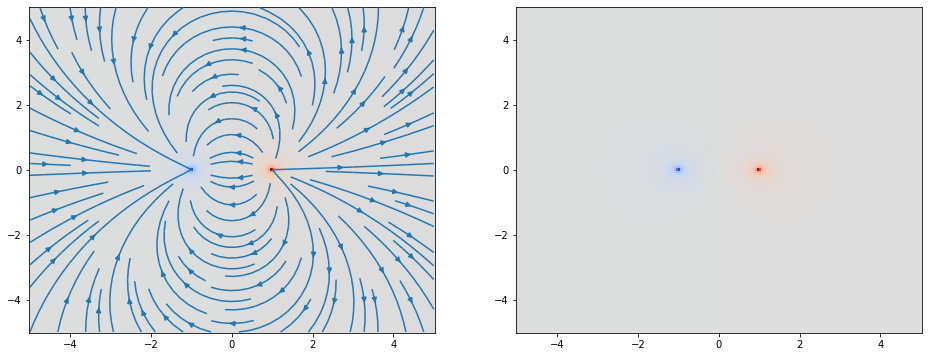

In [3]:
cmap = plt.get_cmap("coolwarm")

q1 = ChargedParticle((-1, 0), -1)
q2 = ChargedParticle((1, 0), 1)

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)


total_field_1 = compute_resulting_field([q1, q2], x, y)
total_potential_1 = compute_resulting_potential([q1, q2], x, y)

bild = plt.figure(figsize=(16, 6))
ax1 = bild.add_subplot(122)
plt.pcolormesh(x, y, total_potential_1, cmap= cmap)
ax2 = bild.add_subplot(121)
plt.pcolormesh(x, y, total_potential_1, cmap=cmap, zorder=0, shading='auto')
plt.streamplot(x, y, total_field_1[:, :, 0], total_field_1[:, :, 1], zorder=50)


plt.show()

Interpretation des Ergebnisses: Hier sehen wir ein Dipol. Bei diesen ziehen sich die Ladungen mit umgekehrten Vorzeichen gegenseitig an. Die Feldlinien gehen von der positiven Ladung (rot) zur negativen (blau). Das Potentail ist hierbei nur von der Gesamtladung $\frac{q}{r}$ und dem Dipolmoment $\frac{\vec{p} \vec{r}}{r^3}$ abhaengig, da das Quadropolmoment hier von verschiendend geringer Relevanz ist.

(ii) Vier Ladungen an den Ecken eines Quadrates in der xy-Ebene, wobei die Kanten Ladungen
mit umgekehrten Vorzeichen verbinden;

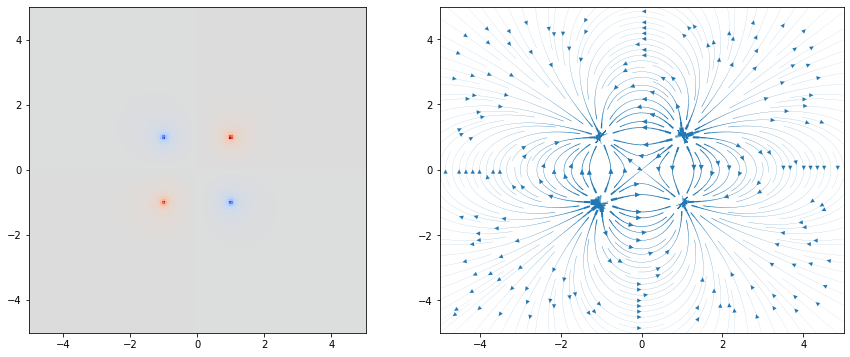

In [5]:
q3 = ChargedParticle([-1, 1], -1)
q4 = ChargedParticle((-1,-1), 1)
q5 = ChargedParticle((1,-1), -1)
q6 = ChargedParticle((1, 1), 1)

total_field_2 = compute_resulting_field([q3, q4, q5, q6], x, y)
total_potential_2 = compute_resulting_potential([q3, q4, q5, q6], x, y)

lw = np.sqrt(np.linalg.norm(total_field_2, axis=2))
lw /= lw.max()

fig, [ax3, ax4] = plt.subplots(ncols=2, figsize=(14.6, 6), gridspec_kw={'width_ratios': [1, 1.2]})
ax3.pcolormesh(x, y, total_potential_2, cmap= plt.get_cmap("coolwarm"))

ax4.streamplot(x, y, total_field_2[:, :, 0], total_field_2[:, :, 1], linewidth=20*lw, density=2)

plt.show()

Interpretation des Ergebnisses: Hier sehen wir einen Quadropol. Die Ladungen haben untereinander verschiedene Wechselwirkungen. 
Bei einem Quadropol sind die Gesamtladungen $q = \frac{q}{r}$ das Dipolmoment $p = \frac{\vec{p} \vec{r}}{r^3}$ und das Quadropolmoment $Q = \frac{\vec{r}^T Q \vec{r}}{2r^5}$ relevant waehrend die restlichen Glieder des Potentials geringer Relevanz sind.

(iii) Sechs zufällig verteile Ladungen in der xy-Ebene mit verschwindender Gesamtladung.$\\$
Hinweis: Verwenden Sie das Modul random und initialisieren Sie den Zufallsgenerator zuerst
mittels random.seed(n), wobei Sie für n Ihre Matrikelnummer verwenden. $\\$
Danach können Sie mit random.uniform(min, max) reelle Zufallszahlen x mit $ min ≤ x ≤ max $
erzeugen. Wenn Sie zu zweit abgeben, erstellen Sie zwei Plots, je einen für jede ihrer beiden
Matrikelnummern.

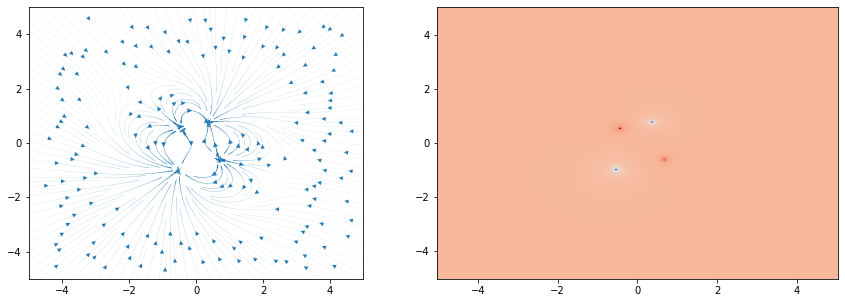

In [ ]:
import random

random.seed(10040204)

q1 = ChargedParticle([random.uniform(-10, 10), random.uniform(-10, 10)], -10)
q2 = ChargedParticle([random.uniform(-10, 10), random.uniform(-10, 10)], 5)
q3 = ChargedParticle([random.uniform(-10, 10), random.uniform(-10, 10)], 6)
q4 = ChargedParticle([random.uniform(-10, 10), random.uniform(-10, 10)], -7)
q5 = ChargedParticle([random.uniform(-10, 10), random.uniform(-10, 10)], 1)
q6 = ChargedParticle([random.uniform(-10, 10), random.uniform(-10, 10)], -2)

x2 = np.linspace(-50, 50, 200)
y2 = np.linspace(-50, 50, 200)

total_field = compute_resulting_field([q1, q2, q3, q4], x2, y2)
total_potential = compute_resulting_potential([q1, q2, q3, q4], x2, y2)

lw = np.sqrt(np.linalg.norm(total_field, axis=2))
lw /= lw.max()

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(14.5, 5), gridspec_kw={'width_ratios': [1, 1.2]})
ax1.streamplot(x, y, total_field[:, :, 0], total_field[:, :, 1], linewidth=20*lw, density=2)

mappable = ax2.pcolormesh(x, y, total_potential, cmap=cmap, shading='auto')

plt.show()

Interpretation des Ergebnisses: Hier sehen wir einen Multipol. Hier ist das Potential $\phi(\vec{r}) = \frac{q}{r} + \frac{\vec{p} \vec{r}}{r^3} + \frac{\vec{r}^T Q \vec{r}}{2r^5}+\mathcal{O}{(r^-4)}$
. Somit ist jedes Glied Relevant und das Feld sieht aus wie ein elektrisches Feld mit Quellen